In [38]:
import re
import matplotlib.pyplot as plt
import torch
from helpers import letter_sorted
from helpers import plot_bigrams

In [39]:
with open('data/turkce_isim_veri_seti/tr_isimler.txt', 'r', encoding='utf-8') as file:
    text = file.read()
names = re.split(r'\n', text)

In [40]:
names[:15]

['rukiye',
 'selami',
 'mukaddes',
 'şeyhmus',
 'reyhan',
 'rukyete',
 'kuzey',
 'sadı',
 'nihal',
 'sevin',
 'gönül',
 'kamuran',
 'recep',
 'selman',
 'güzel']

Let's check some name statistics.

In [41]:
name_lengths = [len(n) for n in names]
longest_names = [n for n in names if len(n) == max(name_lengths)]
shortest_names = [n for n in names if len(n) == min(name_lengths)]
print(f"Average name length: {sum(name_lengths)/len(name_lengths):.2f} characters")
print(f"Longest names ({len(longest_names[0])} characters): {longest_names}")
print(f"Shortest names ({len(shortest_names[0])} characters): {shortest_names}")

Average name length: 5.73 characters
Longest names (12 characters): ['abdulmütalip']
Shortest names (3 characters): ['gül', 'nuh', 'ela', 'ada', 'cem', 'isa', 'nur', 'eda', 'can', 'ali', 'oya', 'alp']


## Bigram Analysis

### Character Frequencies 

In [42]:
all_chars = ''.join(names)

In [43]:
char_freq ={}
for c in all_chars:
    char_freq[c] = char_freq.get(c, 0) + 1
char_freq = dict(sorted(char_freq.items(), key=lambda t:t[1], reverse=True))
chars = letter_sorted(char_freq)

In [44]:
char_freq

{'a': 899,
 'e': 825,
 'i': 576,
 'n': 507,
 'r': 438,
 'l': 350,
 'm': 345,
 's': 281,
 'y': 262,
 'h': 257,
 'd': 220,
 't': 214,
 'u': 201,
 'ü': 181,
 'b': 172,
 'z': 171,
 'k': 153,
 'f': 121,
 'g': 115,
 'ş': 90,
 'v': 80,
 'c': 71,
 'ı': 59,
 'o': 38,
 'p': 35,
 'ö': 25,
 'ğ': 24,
 'ç': 22,
 'j': 10}

In [45]:
len(char_freq.keys())

29

In [46]:
chars

{'a': 899,
 'b': 172,
 'c': 71,
 'ç': 22,
 'd': 220,
 'e': 825,
 'f': 121,
 'g': 115,
 'ğ': 24,
 'h': 257,
 'ı': 59,
 'i': 576,
 'j': 10,
 'k': 153,
 'l': 350,
 'm': 345,
 'n': 507,
 'o': 38,
 'ö': 25,
 'p': 35,
 'r': 438,
 's': 281,
 'ş': 90,
 't': 214,
 'u': 201,
 'ü': 181,
 'v': 80,
 'y': 262,
 'z': 171}

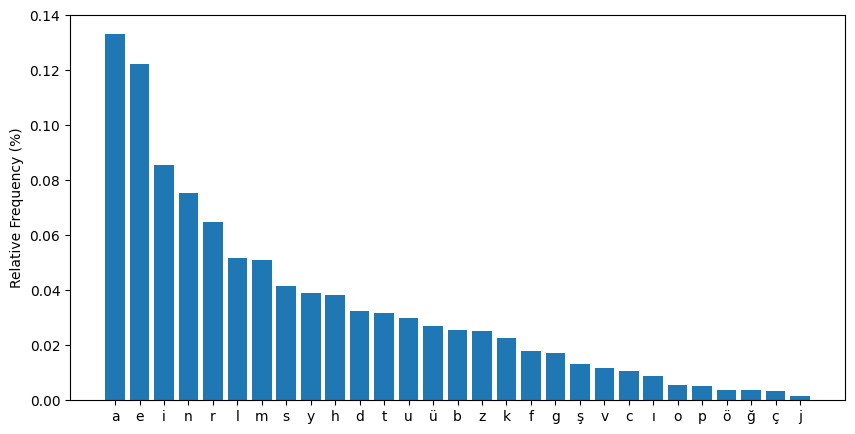

In [47]:
k = [k for k in char_freq.keys()]
v = [v/sum(char_freq.values()) for v in char_freq.values()]

plt.figure(figsize=(10, 5))
plt.bar(k, v)
plt.ylabel("Relative Frequency (%)")
plt.show()

### Bigram Calculation

Let's investigate the first example more closely:

In [48]:
print(names[0])

rukiye


It is important to note that the we need two characters to create bigrams, `f-a-d-i-m-e` where the bigrams become:
```
<NULL> -> f     
f      -> a     
a      -> d     
d      -> i     
i      -> m     
m      -> e     
e      -> <NULL>
```
where the special token `<NULL>` represents the non-existent characters. Here, instead of the `<NULL>` token, we can use start and finish tokens `<B> (BAS)` and `<S> (SON)`, respectively.
```
<B>    -> f  
f      -> a  
a      -> d  
d      -> i  
i      -> m  
m      -> e  
e      -> <S>
```

In [49]:
B_dict = {} # Bigram data
for n in names:
    token = ['<B>'] + list(n) + ['<S>']
    for char1, char2 in zip(token, token[1:]):
        print(char1 + ' -> ' + char2)
        bigram = (char1, char2)
        B_dict[bigram] = B_dict.get(bigram, 0) + 1

<B> -> r
r -> u
u -> k
k -> i
i -> y
y -> e
e -> <S>
<B> -> s
s -> e
e -> l
l -> a
a -> m
m -> i
i -> <S>
<B> -> m
m -> u
u -> k
k -> a
a -> d
d -> d
d -> e
e -> s
s -> <S>
<B> -> ş
ş -> e
e -> y
y -> h
h -> m
m -> u
u -> s
s -> <S>
<B> -> r
r -> e
e -> y
y -> h
h -> a
a -> n
n -> <S>
<B> -> r
r -> u
u -> k
k -> y
y -> e
e -> t
t -> e
e -> <S>
<B> -> k
k -> u
u -> z
z -> e
e -> y
y -> <S>
<B> -> s
s -> a
a -> d
d -> ı
ı -> <S>
<B> -> n
n -> i
i -> h
h -> a
a -> l
l -> <S>
<B> -> s
s -> e
e -> v
v -> i
i -> n
n -> <S>
<B> -> g
g -> ö
ö -> n
n -> ü
ü -> l
l -> <S>
<B> -> k
k -> a
a -> m
m -> u
u -> r
r -> a
a -> n
n -> <S>
<B> -> r
r -> e
e -> c
c -> e
e -> p
p -> <S>
<B> -> s
s -> e
e -> l
l -> m
m -> a
a -> n
n -> <S>
<B> -> g
g -> ü
ü -> z
z -> e
e -> l
l -> <S>
<B> -> k
k -> i
i -> b
b -> a
a -> r
r -> <S>
<B> -> m
m -> e
e -> l
l -> i
i -> k
k -> e
e -> <S>
<B> -> b
b -> a
a -> ş
ş -> a
a -> k
k -> <S>
<B> -> l
l -> e
e -> y
y -> m
m -> u
u -> n
n -> <S>
<B> -> b
b -> e
e -> s
s -> 

In [50]:
B_freq = sorted(B_dict.items(), key=lambda item:item[1], reverse=True)
B_freq

[(('n', '<S>'), 263),
 (('e', '<S>'), 202),
 (('a', 'n'), 193),
 (('h', 'a'), 151),
 (('a', '<S>'), 131),
 (('e', 'r'), 122),
 (('<B>', 's'), 119),
 (('<B>', 'm'), 113),
 (('r', '<S>'), 107),
 (('<B>', 'n'), 96),
 (('<B>', 'a'), 96),
 (('m', 'e'), 94),
 (('s', 'e'), 92),
 (('t', '<S>'), 90),
 (('i', 'n'), 85),
 (('<B>', 'b'), 78),
 (('l', '<S>'), 76),
 (('a', 'y'), 75),
 (('<B>', 'h'), 73),
 (('ü', 'l'), 68),
 (('<B>', 'e'), 68),
 (('e', 'l'), 67),
 (('r', 'a'), 67),
 (('y', 'e'), 66),
 (('r', 'e'), 65),
 (('n', 'e'), 65),
 (('<B>', 'g'), 64),
 (('r', 'i'), 64),
 (('g', 'ü'), 63),
 (('e', 'y'), 61),
 (('b', 'e'), 61),
 (('u', 'r'), 60),
 (('l', 'i'), 60),
 (('a', 'h'), 60),
 (('a', 'l'), 59),
 (('e', 'n'), 59),
 (('d', 'i'), 59),
 (('i', '<S>'), 58),
 (('e', 'm'), 58),
 (('i', 'y'), 57),
 (('s', 'a'), 57),
 (('m', '<S>'), 57),
 (('n', 'a'), 56),
 (('e', 't'), 55),
 (('d', 'e'), 54),
 (('a', 'r'), 54),
 (('i', 'l'), 52),
 (('i', 'r'), 51),
 (('l', 'a'), 50),
 (('m', 'i'), 50),
 (('m', '

Instead of having a dictionary/list storing the bigram information in a 2D array would benefit us much better. In order to do that, we might need two look-up tables, which would map characters-to-indices and indices-to-characters:

In [51]:
# Indice to char mapping
char2ind = {c:i for i, c in enumerate(chars.keys())}
char2ind['<B>'] = 29
char2ind['<S>'] = 30
char2ind

{'a': 0,
 'b': 1,
 'c': 2,
 'ç': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'ğ': 8,
 'h': 9,
 'ı': 10,
 'i': 11,
 'j': 12,
 'k': 13,
 'l': 14,
 'm': 15,
 'n': 16,
 'o': 17,
 'ö': 18,
 'p': 19,
 'r': 20,
 's': 21,
 'ş': 22,
 't': 23,
 'u': 24,
 'ü': 25,
 'v': 26,
 'y': 27,
 'z': 28,
 '<B>': 29,
 '<S>': 30}

In [52]:
ind2char = {i:c for i, c in enumerate(char2ind.keys())}
ind2char

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'ç',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'ğ',
 9: 'h',
 10: 'ı',
 11: 'i',
 12: 'j',
 13: 'k',
 14: 'l',
 15: 'm',
 16: 'n',
 17: 'o',
 18: 'ö',
 19: 'p',
 20: 'r',
 21: 's',
 22: 'ş',
 23: 't',
 24: 'u',
 25: 'ü',
 26: 'v',
 27: 'y',
 28: 'z',
 29: '<B>',
 30: '<S>'}

In [53]:
char2ind['a']

0

In [54]:
nchars = len(char2ind.keys())
B = torch.zeros((nchars, nchars))
for idx in range(len(B_freq)):
    bigram = B_freq[idx][0]
    gram1 = bigram[0]
    gram2 = bigram[1]
    B[char2ind[gram1], char2ind[gram2]] = B_freq[idx][1]

In [55]:
B

tensor([[  3.,  34.,   7.,   1.,  38.,   1.,  13.,   4.,   3.,  60.,   0.,  16.,
           0.,  20.,  59.,  36., 193.,   0.,   0.,   6.,  54.,  38.,  10.,  50.,
           0.,   0.,   7.,  75.,  40.,   0., 131.],
        [ 35.,   1.,   0.,   0.,  15.,  61.,   0.,   0.,   0.,   0.,   1.,  29.,
           0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  10.,   0.,   0.,   0.,
          11.,   5.,   0.,   0.,   0.,   0.,   3.],
        [ 26.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,   0.,   1.,  11.,
           0.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
           2.,   1.,   0.,   0.,   0.,   0.,   0.],
        [  3.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   2.,   6.,
           0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,   0.,   0.,   0.,   4.],
        [ 39.,   0.,   0.,   0.,  12.,  54.,   0.,   0.,   0.,   0.,  12.,  59.,
           0.,   0.,   0.,   0.,   1.,   5.,   2.,   0.,   7., 

In [56]:
B.shape

torch.Size([31, 31])

Let's visualize the bigram frequency statistics

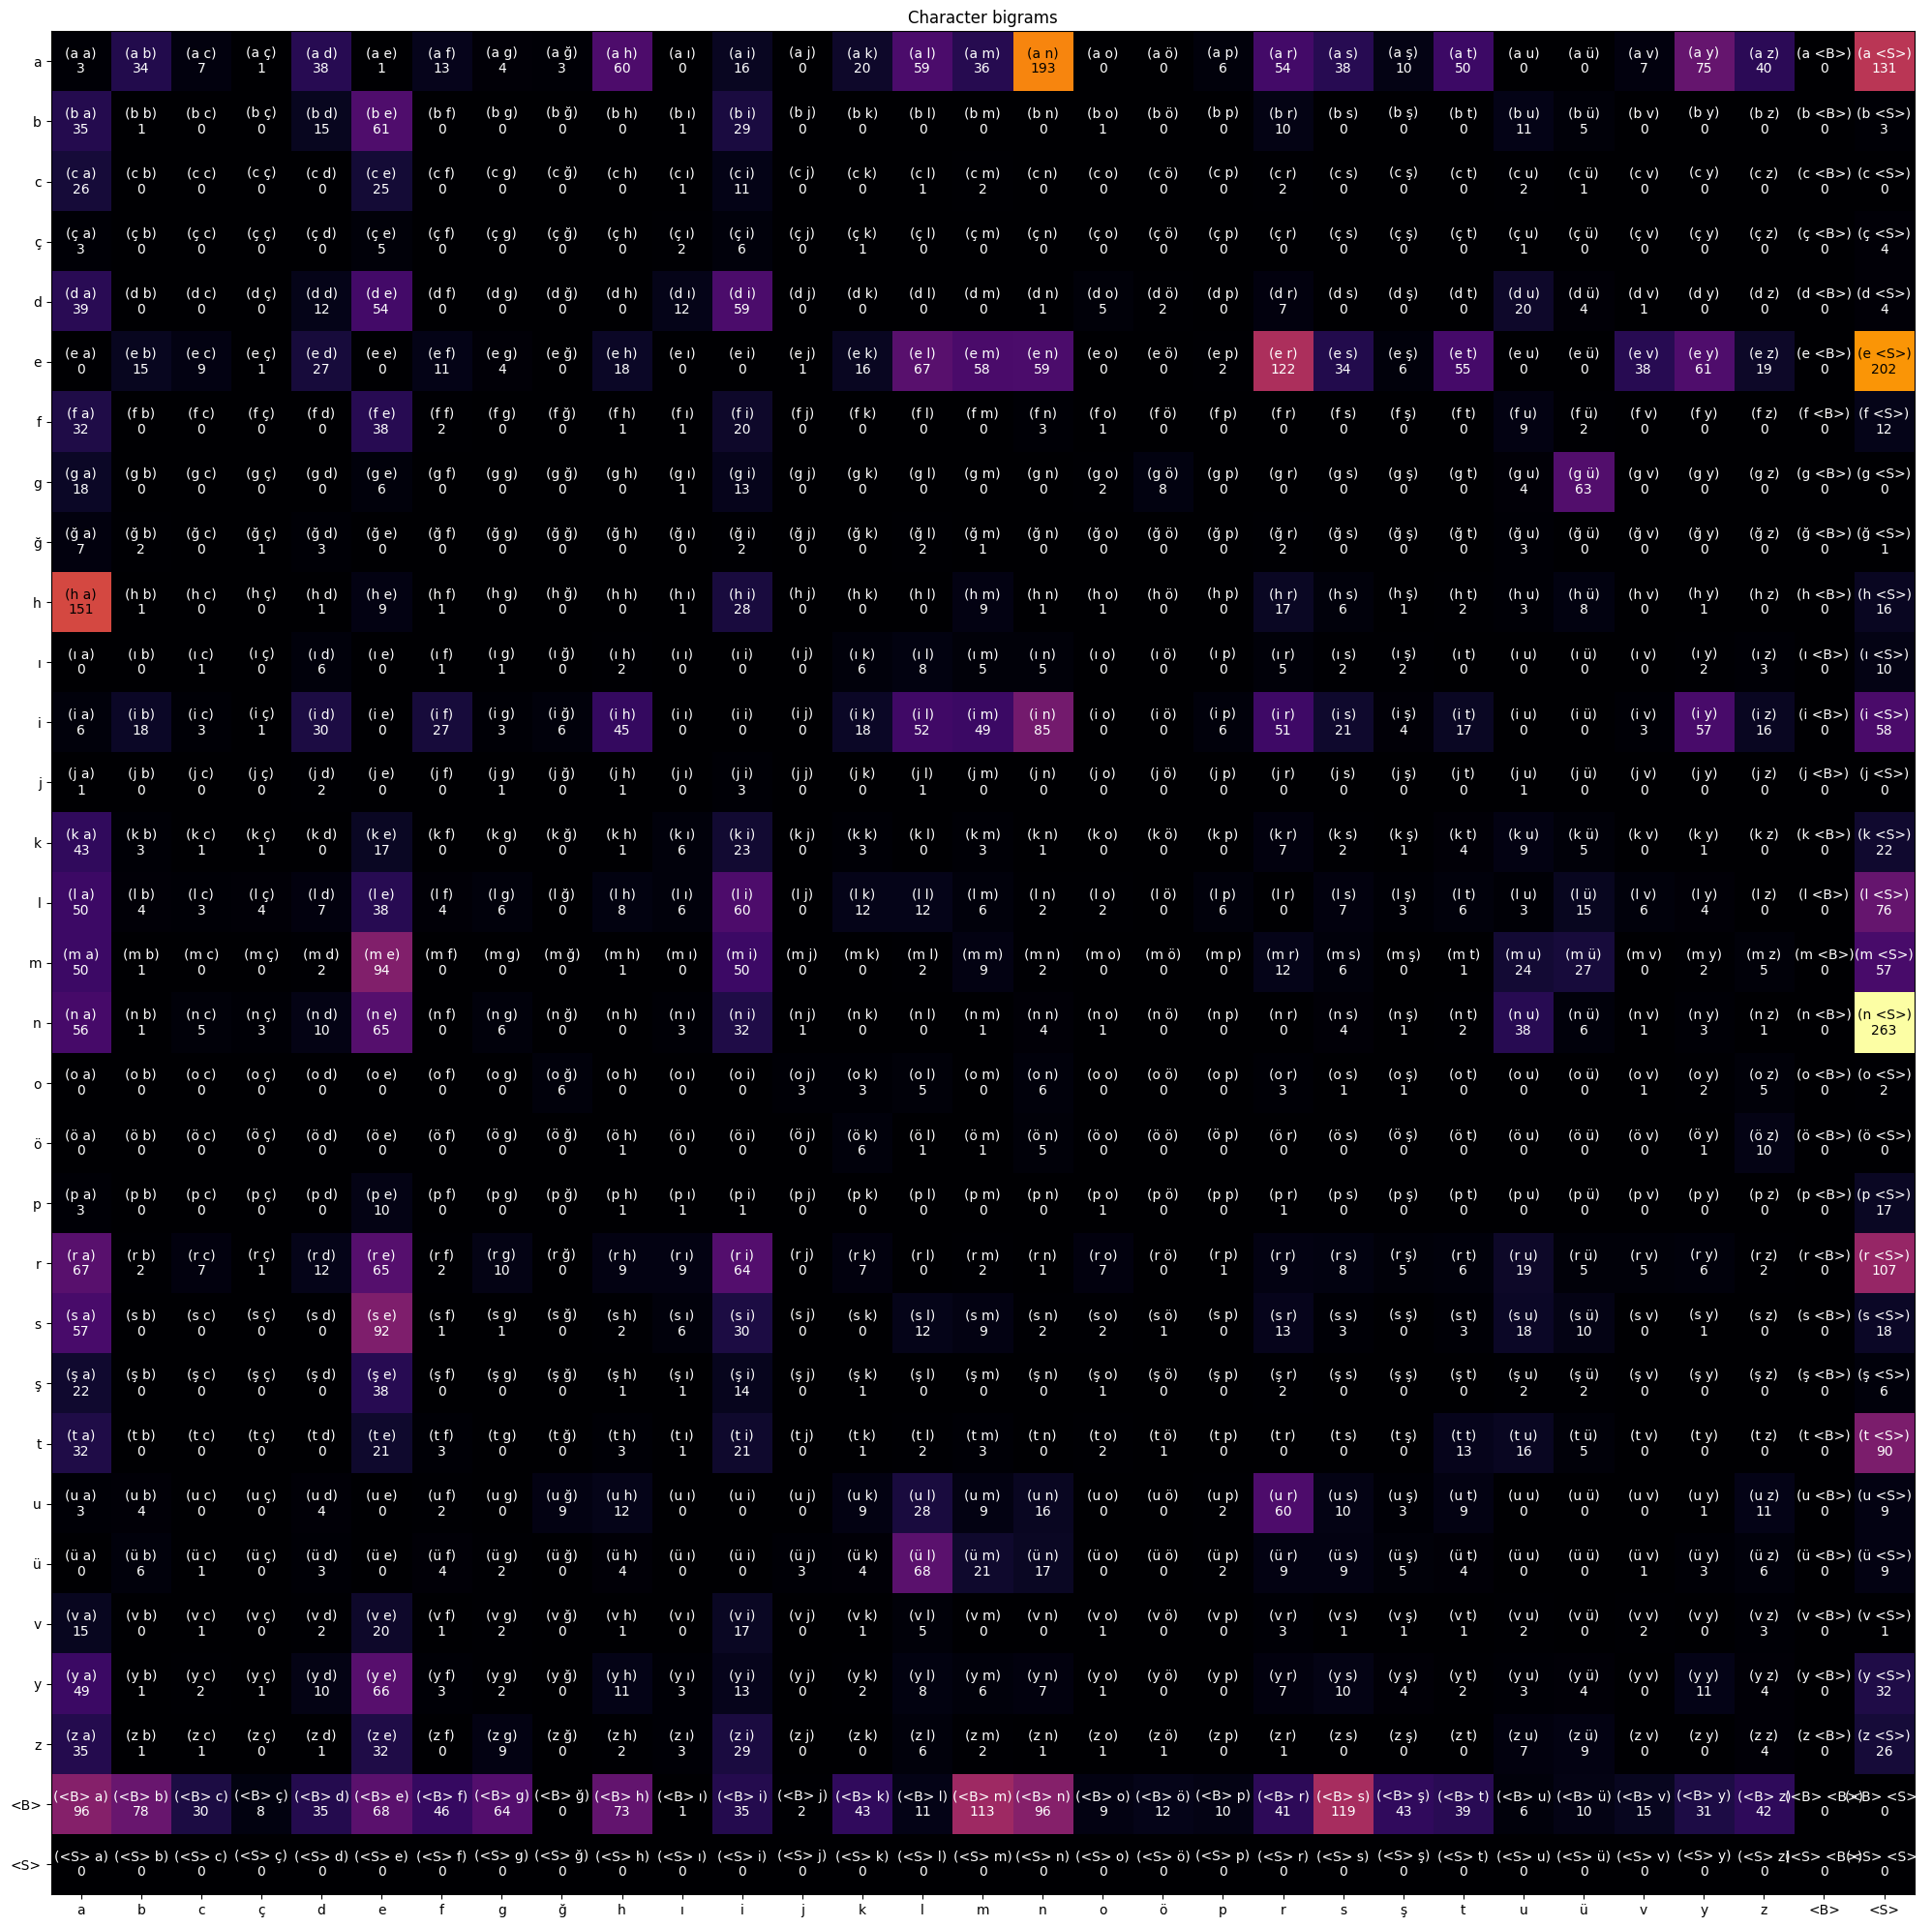

In [57]:
ext_chars = list(char2ind.keys())
fig, ax = plt.subplots(figsize=(25, 25))
ax = plot_bigrams(B, ext_chars, ax)
plt.show()

Let's confirm the results manually:

In [58]:
first_letter = {}
for n in names:
    first_letter[n[0]] = first_letter.get(n[0], 0) + 1
first_letter = dict(sorted(first_letter.items(), key=lambda it:it[1], reverse=True))

In [59]:
first_letter

{'s': 119,
 'm': 113,
 'n': 96,
 'a': 96,
 'b': 78,
 'h': 73,
 'e': 68,
 'g': 64,
 'f': 46,
 'ş': 43,
 'k': 43,
 'z': 42,
 'r': 41,
 't': 39,
 'd': 35,
 'i': 35,
 'y': 31,
 'c': 30,
 'v': 15,
 'ö': 12,
 'l': 11,
 'ü': 10,
 'p': 10,
 'o': 9,
 'ç': 8,
 'u': 6,
 'j': 2,
 'ı': 1}

Let's take a look at the bigrams table above:
- We notice that a name would never start with an end token (`<S>`), thus, the row consists of all zeros.
- Similarly, we have a column of zeros since no name will ever end with the starting token (`<B>`), thus, the column consists of all zeros.
- The only valid combinations for the the tokens are:
    - `<B>abc<S>` where any combination of `<S>abc<B>` are invalid.
    - Also, `<B><S>`, where it is a name with no letters.

We can use a better approach to fix those problems. Instead of having two special tokens we will have a single `.` token to imply it is the beginning/end of a word.

In [60]:
# Indice to char mapping
char2ind = {}
char2ind = {c:i for i, c in enumerate(chars, start=1)}
char2ind['.'] = 0
char2ind = dict(sorted(char2ind.items(), key=lambda item:item[1]))
char2ind

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'ç': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'ğ': 9,
 'h': 10,
 'ı': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'ö': 19,
 'p': 20,
 'r': 21,
 's': 22,
 'ş': 23,
 't': 24,
 'u': 25,
 'ü': 26,
 'v': 27,
 'y': 28,
 'z': 29}

In [61]:
ind2char = {}
ind2char = {i:c for c, i in char2ind.items()}
ind2char

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'ç',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'ğ',
 10: 'h',
 11: 'ı',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'ö',
 20: 'p',
 21: 'r',
 22: 's',
 23: 'ş',
 24: 't',
 25: 'u',
 26: 'ü',
 27: 'v',
 28: 'y',
 29: 'z'}

In [62]:
token_count = {}
for name in names:
    token = ["."] + list(name) + ["."]
    for char1, char2 in zip(token, token[1:]):
        token_count[(char1, char2)] = token_count.get((char1, char2), 0) + 1
token_count = dict(sorted(token_count.items(), key=lambda item:item[1], reverse=True))
token_count

{('n', '.'): 263,
 ('e', '.'): 202,
 ('a', 'n'): 193,
 ('h', 'a'): 151,
 ('a', '.'): 131,
 ('e', 'r'): 122,
 ('.', 's'): 119,
 ('.', 'm'): 113,
 ('r', '.'): 107,
 ('.', 'n'): 96,
 ('.', 'a'): 96,
 ('m', 'e'): 94,
 ('s', 'e'): 92,
 ('t', '.'): 90,
 ('i', 'n'): 85,
 ('.', 'b'): 78,
 ('l', '.'): 76,
 ('a', 'y'): 75,
 ('.', 'h'): 73,
 ('ü', 'l'): 68,
 ('.', 'e'): 68,
 ('e', 'l'): 67,
 ('r', 'a'): 67,
 ('y', 'e'): 66,
 ('r', 'e'): 65,
 ('n', 'e'): 65,
 ('.', 'g'): 64,
 ('r', 'i'): 64,
 ('g', 'ü'): 63,
 ('e', 'y'): 61,
 ('b', 'e'): 61,
 ('u', 'r'): 60,
 ('l', 'i'): 60,
 ('a', 'h'): 60,
 ('a', 'l'): 59,
 ('e', 'n'): 59,
 ('d', 'i'): 59,
 ('i', '.'): 58,
 ('e', 'm'): 58,
 ('i', 'y'): 57,
 ('s', 'a'): 57,
 ('m', '.'): 57,
 ('n', 'a'): 56,
 ('e', 't'): 55,
 ('d', 'e'): 54,
 ('a', 'r'): 54,
 ('i', 'l'): 52,
 ('i', 'r'): 51,
 ('l', 'a'): 50,
 ('m', 'i'): 50,
 ('m', 'a'): 50,
 ('a', 't'): 50,
 ('i', 'm'): 49,
 ('y', 'a'): 49,
 ('.', 'f'): 46,
 ('i', 'h'): 45,
 ('k', 'a'): 43,
 ('.', 'ş'): 43,
 ('.'

In [63]:
nchars = len(char2ind.keys())
B = torch.zeros((nchars, nchars))
for idx in range(len(token_count.keys())):
    bigram = list(token_count.keys())[idx]
    gram1 = bigram[0]
    gram2 = bigram[1]
    B[char2ind[gram1], char2ind[gram2]] = list(token_count.values())[idx]
B

tensor([[  0.,  96.,  78.,  30.,   8.,  35.,  68.,  46.,  64.,   0.,  73.,   1.,
          35.,   2.,  43.,  11., 113.,  96.,   9.,  12.,  10.,  41., 119.,  43.,
          39.,   6.,  10.,  15.,  31.,  42.],
        [131.,   3.,  34.,   7.,   1.,  38.,   1.,  13.,   4.,   3.,  60.,   0.,
          16.,   0.,  20.,  59.,  36., 193.,   0.,   0.,   6.,  54.,  38.,  10.,
          50.,   0.,   0.,   7.,  75.,  40.],
        [  3.,  35.,   1.,   0.,   0.,  15.,  61.,   0.,   0.,   0.,   0.,   1.,
          29.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,  10.,   0.,   0.,
           0.,  11.,   5.,   0.,   0.,   0.],
        [  0.,  26.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,   0.,   1.,
          11.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
           0.,   2.,   1.,   0.,   0.,   0.],
        [  4.,   3.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   0.,   0.,   2.,
           6.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
      

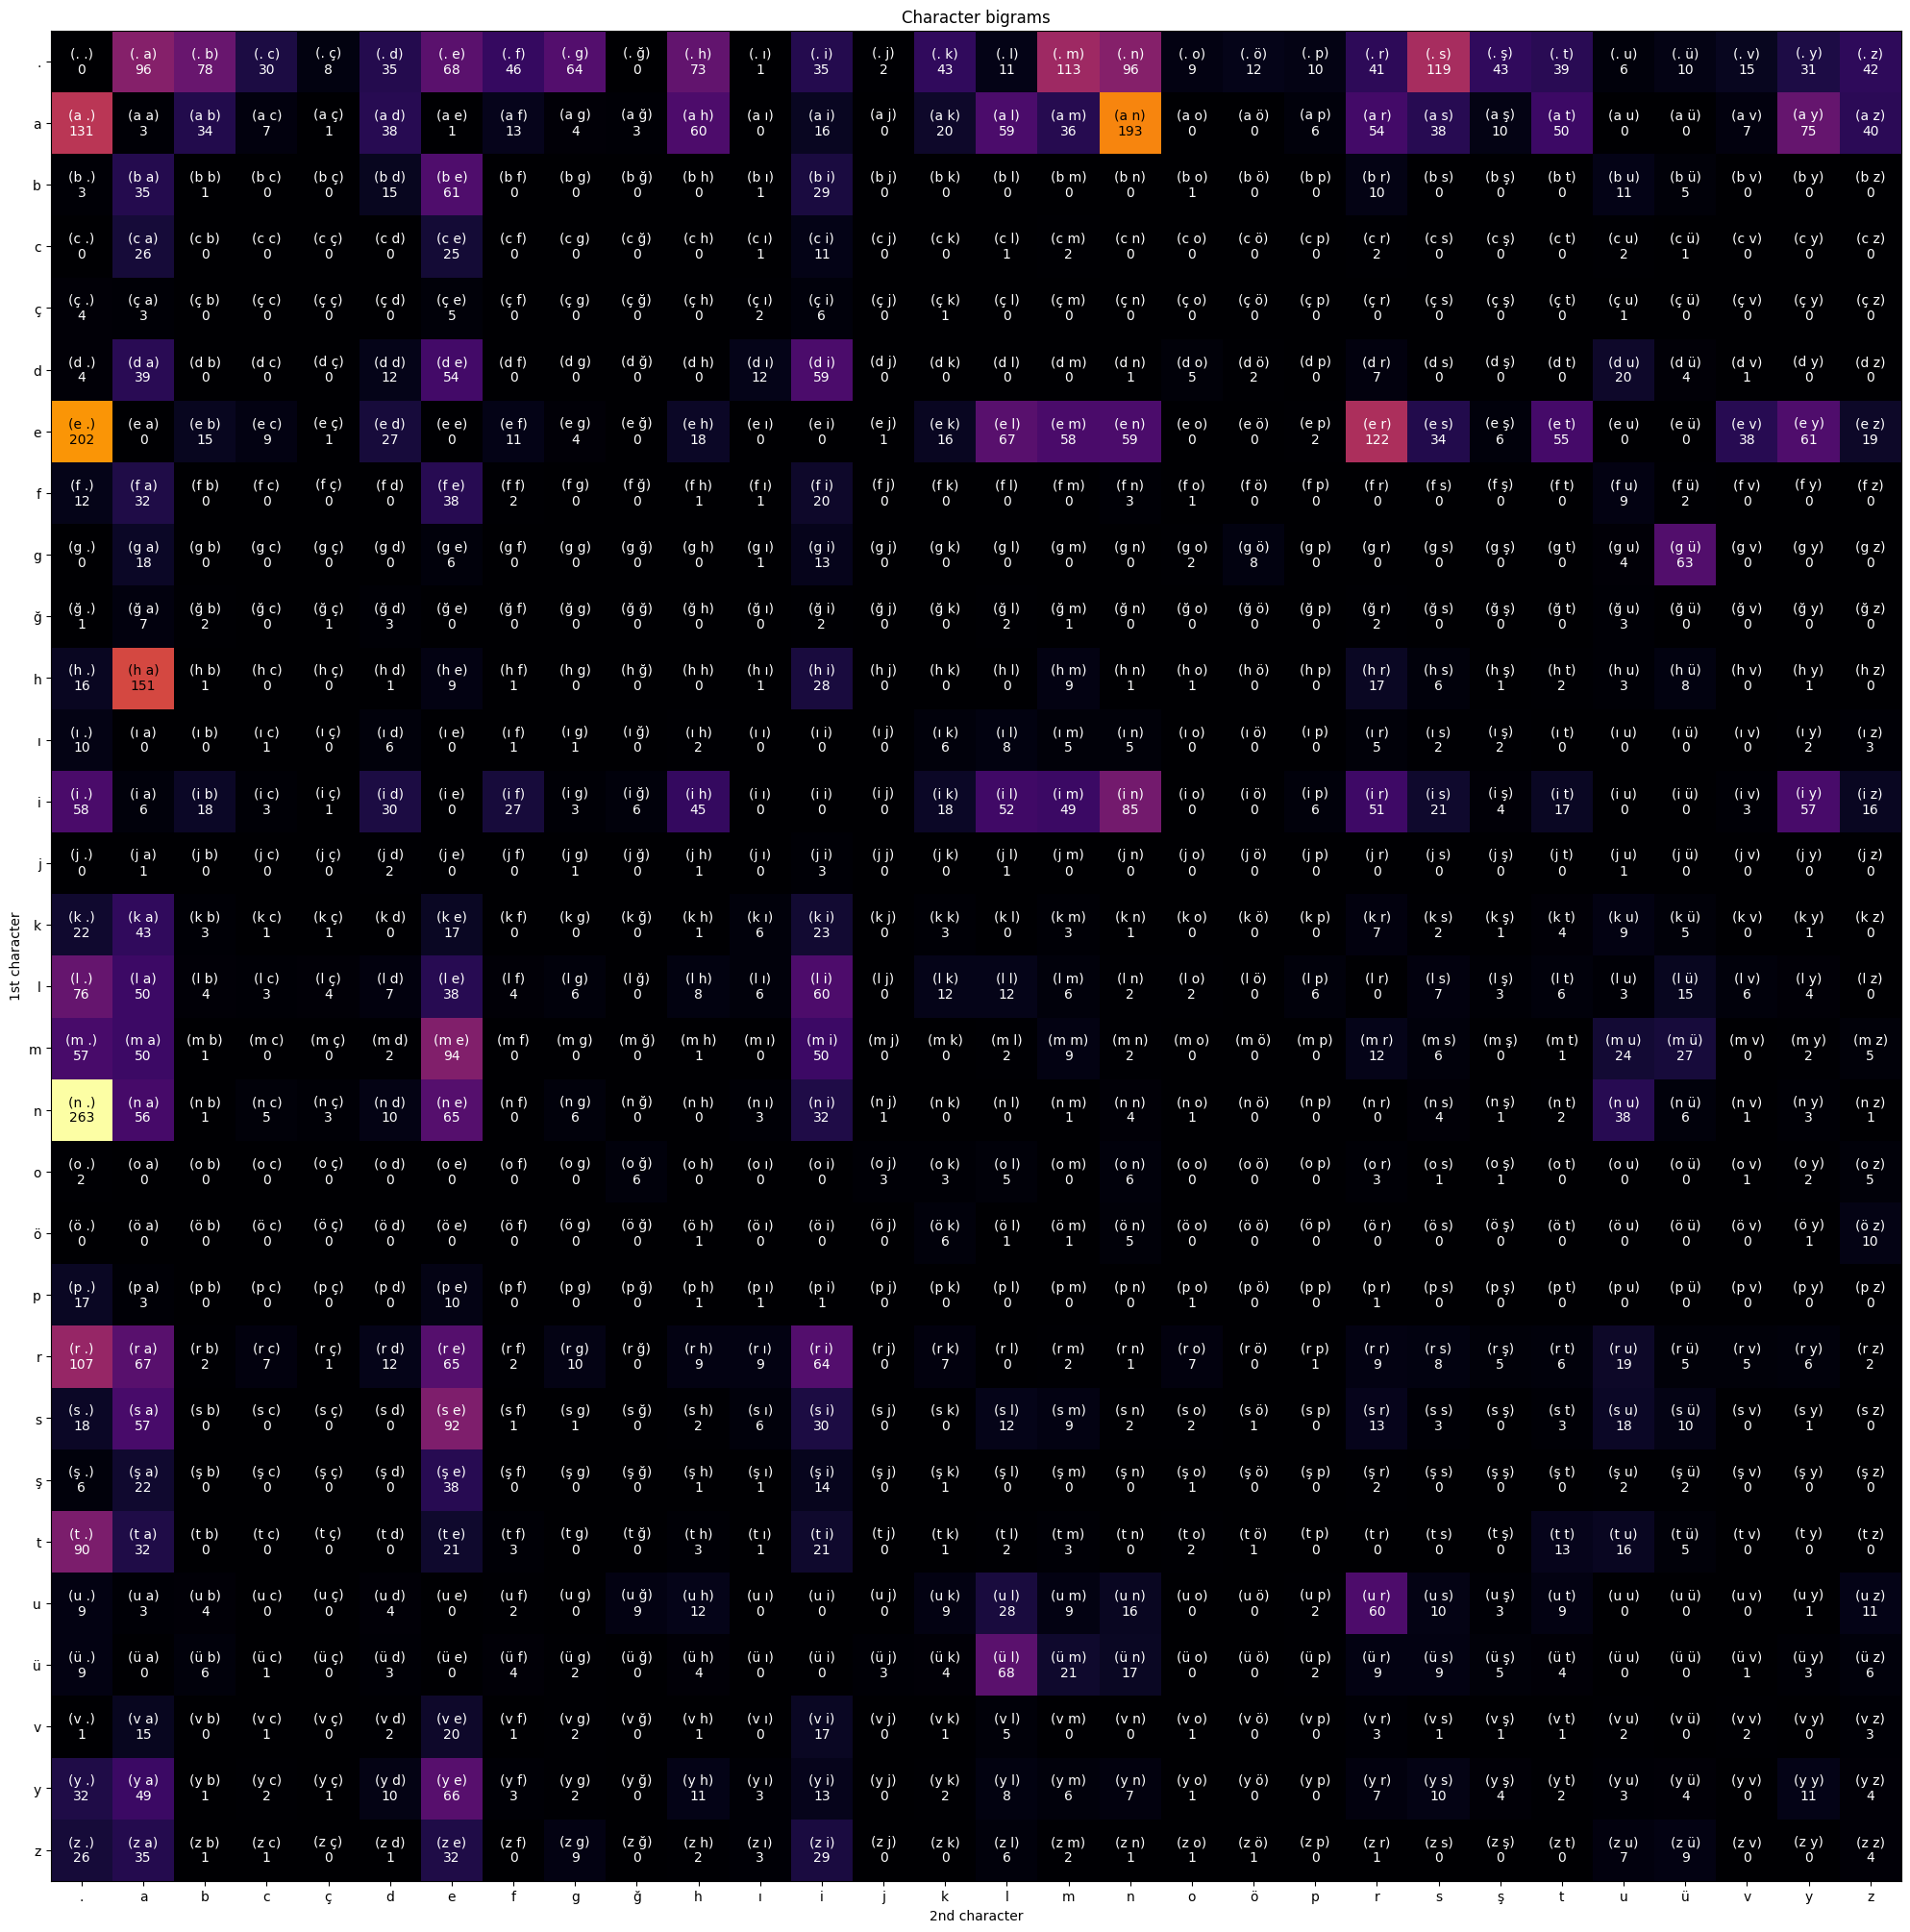

In [64]:
fig, ax = plt.subplots(figsize=(25, 25))
ax = plot_bigrams(B, list(char2ind.keys()), ax)
plt.ylabel("1st character")
plt.xlabel("2nd character")
plt.show()

The table above presents a distribution mapping the initial characters of names (rows) against their terminal characters (columns). Analysis reveals that:
- Names most commonly begin with the character `s` (count 119)
- Names most frequently end with the character `n` (count 263)

Since we've created the bigram relationships, now we want to sample from this statistical distribution, which will correspond to generation of synthetic Turkish names from the data. Thus, the first step will be converting the counts into probabilities:

In [65]:
P = -torch.ones((len(char2ind.keys()),len(char2ind.keys())))
for idx in range(len(char2ind.keys())):
    P[idx] = B[idx].float()/sum(B[idx])
P

tensor([[0.0000, 0.0816, 0.0663, 0.0255, 0.0068, 0.0298, 0.0578, 0.0391, 0.0544,
         0.0000, 0.0621, 0.0009, 0.0298, 0.0017, 0.0366, 0.0094, 0.0961, 0.0816,
         0.0077, 0.0102, 0.0085, 0.0349, 0.1012, 0.0366, 0.0332, 0.0051, 0.0085,
         0.0128, 0.0264, 0.0357],
        [0.1457, 0.0033, 0.0378, 0.0078, 0.0011, 0.0423, 0.0011, 0.0145, 0.0044,
         0.0033, 0.0667, 0.0000, 0.0178, 0.0000, 0.0222, 0.0656, 0.0400, 0.2147,
         0.0000, 0.0000, 0.0067, 0.0601, 0.0423, 0.0111, 0.0556, 0.0000, 0.0000,
         0.0078, 0.0834, 0.0445],
        [0.0174, 0.2035, 0.0058, 0.0000, 0.0000, 0.0872, 0.3547, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0058, 0.1686, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0058, 0.0000, 0.0000, 0.0581, 0.0000, 0.0000, 0.0000, 0.0640, 0.0291,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.3662, 0.0000, 0.0000, 0.0000, 0.0000, 0.3521, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0141, 0.1549, 0.0000, 0.0000, 0.0141, 0.0282, 0.0000,
       

Let's check the sum of each column to make sure that each row corresponds to a PDF.

Now, we will be using the `torch.multinomial()` function to sample the distribution. Before, we do that we will define a generator object to make sure the results are repeatable:

In [66]:
g = torch.Generator().manual_seed(123)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.2782, 0.4853, 0.2365])

In [67]:
torch.sum(p, 0)

tensor(1.0000)

In [68]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1,
        0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0,
        1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 2, 0])

Let's sample the character distribution!

In [ ]:
g = torch.Generator().manual_seed(12345678)

idx = 0 # initial character index
generated_name = []
while True:
    generated_name.append(ind2char[idx])
    probs = B[idx].float()/sum(B[idx])
    idx_new = torch.multinomial(probs, num_samples=1, replacement=True, generator=g)
    print(f"Probability: {probs[idx_new.item()]:.4f}")
    idx = idx_new.item()
    if idx == 0:
        generated_name.append(ind2char[idx])
        break
print(''.join(generated_name))

tensor([8])
Probability: 0.0544
tensor([26])
Probability: 0.5478
tensor([23])
Probability: 0.0276
tensor([6])
Probability: 0.4222
tensor([15])
Probability: 0.0812
tensor([1])
Probability: 0.1429
tensor([22])
Probability: 0.0423
tensor([6])
Probability: 0.3274
tensor([2])
Probability: 0.0182
tensor([12])
Probability: 0.1686
tensor([21])
Probability: 0.0885
tensor([1])
Probability: 0.1530
tensor([17])
Probability: 0.2147
tensor([0])
Probability: 0.5187
.güşelasebiran.


In [82]:
g = torch.Generator().manual_seed(123)
probs = B[0].float()/sum(B[0])
a = torch.multinomial(probs, num_samples=1, replacement=True, generator=g)
print(a)
a.item()

tensor([17])


17

In [72]:
P[0, torch.multinomial(B[0].float()/sum(B[0]), num_samples=1, replacement=True, generator=g).item()]

tensor(0.0255)

In [73]:
P[0, 22]

tensor(0.1012)